In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df['Cabin'].nunique()

147

In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

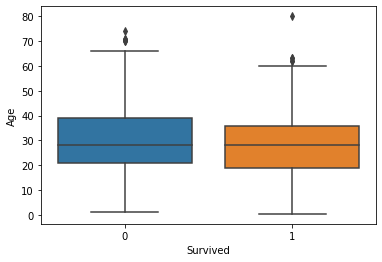

In [6]:
sns.boxplot(data=df,y='Age',x='Survived')

In [7]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
df['Cabin'].sort_values()

583    A10
475    A14
556    A16
284    A19
599    A20
      ... 
884    NaN
885    NaN
886    NaN
888    NaN
890    NaN
Name: Cabin, Length: 891, dtype: object

In [9]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [12]:
df[df['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [13]:
df[df['Ticket']=='3101295']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

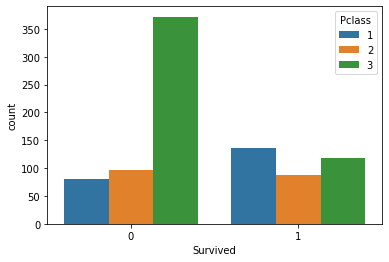

In [14]:
sns.countplot(data=df,x='Survived',hue='Pclass')

In [15]:
# since ticket number and passenger id are irrelevant and include alot of unique values with a low correlation so we are going to drop them
df.drop(['Ticket','PassengerId'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [16]:
df.drop('Cabin',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [17]:
#df.groupby('Pclass').mean()['Age]'
#mean_age_c1 = 

In [18]:
mean_class = (df.groupby('Pclass').mean()['Age'])
mean_class

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [19]:
def fillwmean(Pclass,Age):
    if np.isnan(Age):
        return mean_class[Pclass]
    else:
        return Age
    

In [20]:
df['Age'] = df.apply(lambda x: fillwmean(x['Pclass'], x['Age']), axis=1)

In [21]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,13.00,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,30.00,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,23.45,S
889,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,30.00,C
890,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,7.75,Q


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [23]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [24]:
df.drop('Name',axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [26]:
gender = pd.get_dummies(df['Sex'],drop_first=True)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [27]:
embarked = pd.get_dummies(df['Embarked'])
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [28]:
df = pd.concat([df,gender,embarked],axis=1)
df.drop(['Embarked','Sex'],axis=1,inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,0,1
1,1,1,38.00000,1,0,71.2833,0,1,0,0
2,1,3,26.00000,0,0,7.9250,0,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,0,1
887,1,1,19.00000,0,0,30.0000,0,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,0,1
889,1,1,26.00000,0,0,30.0000,1,1,0,0


In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('Survived',axis=1)
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model = RandomForestClassifier(n_estimators=100)

In [34]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
predictions = model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       136
           1       0.77      0.72      0.75        87

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
X = df.drop('Survived',axis=1).values
y=df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [41]:
scaler = MinMaxScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [46]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(10,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
 
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [93]:
model.fit(x=X, 
          y=y, 
          epochs=750,
          batch_size=128,
          )

Epoch 1/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6612
Epoch 2/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6611
Epoch 3/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6569
Epoch 4/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6593
Epoch 5/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6646
Epoch 6/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6584
Epoch 7/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6627
Epoch 8/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6551
Epoch 9/750
7/7 [==============================] - 0s 4ms/step - loss: 0.6564
Epoch 10/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6643
Epoch 11/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6596
Epoch 12/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6596
Epoch 13/750
7/7 [==============================] - 0s 3ms/st

7/7 [==============================] - 0s 3ms/step - loss: 0.6640
Epoch 105/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6636
Epoch 106/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6610
Epoch 107/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6574
Epoch 108/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6599
Epoch 109/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6601
Epoch 110/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6621
Epoch 111/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6598
Epoch 112/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6572
Epoch 113/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6608
Epoch 114/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6577
Epoch 115/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6626
Epoch 116/750
7/7 [==============================] - 0

7/7 [==============================] - 0s 2ms/step - loss: 0.6714
Epoch 207/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6618
Epoch 208/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6565
Epoch 209/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6610
Epoch 210/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6589
Epoch 211/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6609
Epoch 212/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6661
Epoch 213/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6585
Epoch 214/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6620
Epoch 215/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6602
Epoch 216/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6627
Epoch 217/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6576
Epoch 218/750
7/7 [==============================] - 0

7/7 [==============================] - 0s 2ms/step - loss: 0.6587
Epoch 309/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6584
Epoch 310/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6595
Epoch 311/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6635
Epoch 312/750
7/7 [==============================] - 0s 4ms/step - loss: 0.6585
Epoch 313/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6671
Epoch 314/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6607
Epoch 315/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6592
Epoch 316/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6608
Epoch 317/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6595
Epoch 318/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6618
Epoch 319/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6638
Epoch 320/750
7/7 [==============================] - 0

7/7 [==============================] - 0s 3ms/step - loss: 0.6593
Epoch 411/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6570
Epoch 412/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6612
Epoch 413/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6613
Epoch 414/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6643
Epoch 415/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6621
Epoch 416/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6586
Epoch 417/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6626
Epoch 418/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6595
Epoch 419/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6553
Epoch 420/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6620
Epoch 421/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6633
Epoch 422/750
7/7 [==============================] - 0

7/7 [==============================] - 0s 3ms/step - loss: 0.6669
Epoch 513/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6697
Epoch 514/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6625
Epoch 515/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6593
Epoch 516/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6624
Epoch 517/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6609
Epoch 518/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6577
Epoch 519/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6601
Epoch 520/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6609
Epoch 521/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6520
Epoch 522/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6707
Epoch 523/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6590
Epoch 524/750
7/7 [==============================] - 0

7/7 [==============================] - 0s 3ms/step - loss: 0.6585
Epoch 615/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6573
Epoch 616/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6588
Epoch 617/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6534
Epoch 618/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6662
Epoch 619/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6601
Epoch 620/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6591
Epoch 621/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6581
Epoch 622/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6589
Epoch 623/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6574
Epoch 624/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6568
Epoch 625/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6540
Epoch 626/750
7/7 [==============================] - 0

7/7 [==============================] - 0s 2ms/step - loss: 0.6487
Epoch 717/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6614
Epoch 718/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6532
Epoch 719/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6555
Epoch 720/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6460
Epoch 721/750
7/7 [==============================] - 0s 3ms/step - loss: 0.6412
Epoch 722/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6549
Epoch 723/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6462
Epoch 724/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6483
Epoch 725/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6555
Epoch 726/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6579
Epoch 727/750
7/7 [==============================] - 0s 2ms/step - loss: 0.6531
Epoch 728/750
7/7 [==============================] - 0

In [48]:
df = pd.DataFrame(model.history.history)

<AxesSubplot:>

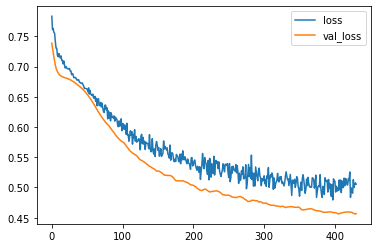

In [49]:
df.plot()

In [94]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions

7/7 [==============================] - 0s 1ms/step


array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [90]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       136
           1       0.92      0.56      0.70        87

    accuracy                           0.81       223
   macro avg       0.85      0.77      0.78       223
weighted avg       0.83      0.81      0.80       223



In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test,predictions)

array([[132,   4],
       [ 37,  50]], dtype=int64)

In [87]:
from tensorflow.keras.models import load_model

In [92]:
model.save('kaaglecomp1.h5') 